# 第6章 グラフ構造

## 6.1 グラフとその表現方法

### 6.1.1 身近にあるグラフ構造

- 要素とつながりからなる構造は、グラフ(graph)またはネットワーク(network)と呼ばれる。

### 6.1.2グラフの基礎

- 頂点(vertex)
    - 節点(ノード、node)とも。
- 辺(edge)
    - 弧(arc)、リンク(link)、枝(branch)とも。
- 隣接(adjacent)
    - ある2つの頂点が1つの辺でつながること。
    - 2つの辺が1つの頂点を共有していること。
- 端点(endpoint)
    - ある辺の両端の頂点。
- 次数(degree)
    - ある頂点に関して、その頂点と隣接する頂点がいくつあるか(=辺が何本でているか)。
- 道(path)
    - ある2つの頂点を結ぶ辺の集合。
- 連結グラフ(connected graph)
    - すべての頂点の間に道があるグラフ。
- 連結成分(connected component)
    - ※定義要確認。
- 閉路(cycle)
    - 出発した頂点に戻ってくる道。
- 木
    - すべての頂点ペアについて、それらを結ぶ道がただ1つしかないグラフ。
- 森
    - いくつかの木で構成されるグラフ。
- 有向グラフ(directed graph)
    - 辺に向きがあるグラフ。

### 6.1.3 グラフを表現するデータ構造

- 隣接行列(adjacency matrix)
    - 行と列のサイズが等しい正方行列。サイズはグラフに含まれる頂点の数。
    - i行j列の要素は、頂点iとjの間に辺があれば1、なければ0。
    - 自分自身につながる辺を考えないので、隣接行列の対角成分はすべて0になる。
- 隣接リスト(adjacency list)
    -  ある頂点に隣接する頂点だけを管理するので無駄が少ない。
    
### 6.1.4 NetworkXの利用

- Pythonで使えるグラフのための外部パッケージ。

In [5]:
import networkx as nx
graph = nx.Graph()
# ノード5と6をつなぐ辺を足す
graph.add_edge(5, 6)
# 同じく6と7
graph.add_edge(6, 7)

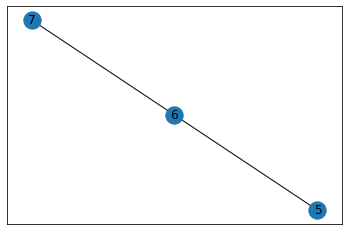

In [7]:
%matplotlib inline
nx.draw_networkx(graph)

## 6.2 グラフ探索のアルゴリズム

- 配列のようにデータが一方向に並んでいる場合は、すべてをもれなく処理したいとき、先頭から順番に計算を進めればよいのでわかりやすい。
- グラフには枝分かれがあるのが普通。グラフの頂点をもれなくすべて処理する方法について学んでいく。

### 6.2.1 グラフを作る

- 最初に頂点と辺の数を決めて、ランダムに辺を発生させてグラフを作る。
    - 同じ片が作られてしまう可能性があるので、辺の数が最初に決めた数になるまで辺の生成を繰り返す関数を作る。
- グラフを隣接行列で表現する。

In [9]:
# コード6.1 グラフの生成
import random

def generate_graph(n, m):
    """n個の頂点とm個の辺を持つグラフを作る"""
    graph_data = [[0] * n for i in range(n)]
    # 同じ片が同一視されるようにsetを用意
    edge_set = set()
    while len(edge_set) < m:
        i, j = random.sample(range(n), 2)
        if i > j: i, j = j, i
        edge_set.add((i, j))
        graph_data[i][j] = graph_data[j][i] = 1
    return graph_data, edge_set

In [10]:
random.seed(6)
node_num = 16
edge_num = 20
my_graph, edge_set = generate_graph(node_num, edge_num)
edge_set

{(0, 2),
 (0, 4),
 (0, 8),
 (1, 9),
 (2, 5),
 (2, 7),
 (2, 13),
 (3, 12),
 (3, 15),
 (5, 11),
 (5, 13),
 (6, 8),
 (6, 11),
 (6, 13),
 (7, 8),
 (7, 11),
 (8, 10),
 (12, 13),
 (12, 15),
 (13, 14)}

In [13]:
sample_graph = nx.Graph()
for edge in edge_set:
    sample_graph.add_edge(*edge)

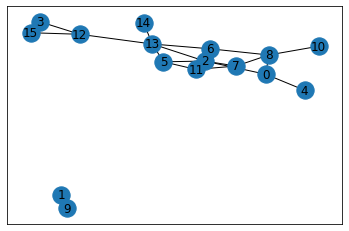

In [14]:
%matplotlib inline
nx.draw_networkx(sample_graph)

In [15]:
 my_graph

[[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]

### 6.2.2 連結グラフを探す

- 連結成分を探し出すことを考える。
    - 到達できる頂点をもれなく探し出す方法
        - ある頂点の隣にある頂点は、隣接行列の1つの行(または列)を参照すればわかる。
            - 例えば頂点iの隣の点を知りたければ、行列のi行目を見ればよい。
        - これはベクトルになるので、頂点iの隣接ベクトルとも呼ばれる。
        - グラフは配列のようにデータが一方向に並んでいるわけではないので、探索の順番を考える必要がある。
            - **幅優先探索(breadth first search)**
                - 近いところから順に到達できる頂点を探しつくす方法
            - **深さ優先探索(depth first search)**
                - 行けるところまで行って、行き止まりになったら最後の分岐まで戻って探索を継続する方法

### 6.2.3 キュー

- 待ち行列。幅優先探索に必要なデータ構造。
- Pythonのリストで実装すると、先頭の要素を取り除く処理にO(n)かかってしまうので、collectionsモジュールのdeque(デック)クラスを利用する。
    - dequeはdouble-ended queueの略で、両側からデータの追加と取り出しが可能。
    - appendで右側(末尾)からデータを追加し、左側(先頭)からpopleftでデータを取り出す。

In [16]:
from collections import deque

queue = deque([])
queue.append(1)
queue.append(2)
queue.append(3)
print(queue)

deque([1, 2, 3])


In [17]:
print(queue.popleft())
print(queue)

1
deque([2, 3])


### 6.2.4 グラフの幅優先探索

- 動作の基本は、今いる頂点の隣の頂点を列挙し、それを到達可能な点として保存していくこと。
    - ある頂点の点は、隣接行列から隣接ベクトルを取り出して参照すればよい。
    - 初めて見る頂点はキューに保存しておく。

In [31]:
# コード6.3 幅優先探索

def breadth_first_search(start, W):
    """隣接行列Wで表現されるグラフについて、
    startから到達できるnodeの一覧を返す
    """
    # リストをキューにする
    work_queue = deque([])
    visited = set()
    # 初期化
    work_queue.append(start)
    visited.add(start)
    while work_queue:
        # 今いる頂点
        here = work_queue.popleft()
        # 今いる頂点に隣接する頂点全てを処理する
        for i, node in enumerate(W[here]):
            # 隣接しなければ何もしない
            if node == 0: continue
            if i not in visited:
                work_queue.append(i)
                visited.add(i)
                print(i) # 勝手に足した
    return visited

In [32]:
breadth_first_search(1, my_graph)

9


{1, 9}

In [33]:
breadth_first_search(10, my_graph)

8
0
6
7
2
4
11
13
5
12
14
3
15


{0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15}

### 6.2.5 深さ優先探索とスタック

- 基本的なアルゴリズムは幅優先と同じだが、調べるべき頂点をキューではなくスタックに入れる。

In [34]:
def depth_first_search(start, W):
    # リストをスタックとして利用する
    work_stack = []
    visited = set()
    work_stack.append(start)
    visited.add(start)
    while work_stack:
        here = work_stack.pop() # 引数なしだと-1を指定したのと同じになる
        for i, node in enumerate(W[here]):
            if node == 0: continue
            if i not in visited:
                work_stack.append(i)
                visited.add(i)
                print(i)
    return visited

In [35]:
depth_first_search(10, my_graph)

8
0
6
7
2
11
5
13
12
14
3
15
4


{0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15}

※結果は同じだが探索の順番は違う(print(i)の結果参照)。

## 6.3 最短距離を求める

### 6.3.1 グラフの最短経路

- **緩和(relaxation)**
    - 始点から各頂点vまでの(※最短？)距離をd(v)として推定し、推定値を徐々に真の値に近づけていく作業。
    - 仮の最短距離をどのような規則に従って緩和し、真の値にしていくかが問題になる。

### 6.3.2 ダイクストラ法(Dijkstra's algorithm)

- 辺の重みが負でない場合利用できる。
- ある頂点sから到達できる、ほかのすべての頂点への最短距離を計算する。
    - sを除く残りの頂点への仮の最短距離を∞に初期化する。s自身への距離は0。
    - 緩和はsから順に行う。
    - アルゴリズムがある頂点vに到達した時点で、その頂点に割り当てられていた仮の最短距離がsからvへの正式な最短距離になる。
    - 次に走査する頂点は、仮の最短距離が小さいものから優先して処理する。
        - 仮の最短距離を更新するたびに、ヒープに入れる。

In [36]:
# コード6.4 ダイクストラ法
import math
import heapq

def dijkstra(start, W):
    """スタートの頂点と隣接行列を受け取り、
    到達できるすべての頂点への最短距離を返す"""
    # 仮の最短距離を∞に設定
    distance_list = [math.inf] * len(W)
    # スタートの頂点だけ距離を0にする
    distance_list[start] = 0
    # 最短距離が確定した頂点
    done_list = []
    # 次に処理する頂点を決めるためのヒープ
    wait_heap = []
    for i, d in enumerate(distance_list):
        # (スタートからの距離、頂点)というタプルを作る
        heapq.heappush(wait_heap, (d, i))
    # ヒープが空になるまで処理を続ける
    while wait_heap:
        p = heapq.heappop(wait_heap)
        i = p[1]
        if i in done_list:
            continue
        # この時点でスタートからiへの距離が確定する
        done_list.append(i)
        # iに隣接するすべての頂点に対する処理
        for j, x in enumerate(W[i]):
            if x == 1 and j not in done_list:
                # 緩和
                d = min(distance_list[j], distance_list[i]+x)
                distance_list[j] = d
                # jへの仮の最短距離をdとしてヒープに追加
                heapq.heappush(wait_heap, (d, j))
    return distance_list

In [37]:
dijkstra(10, my_graph)

[2, inf, 3, 5, 3, 4, 2, 2, 1, inf, 0, 3, 4, 3, 4, 5]

※グラフの通り、別の連結成分である1と9には到達できない(infのまま)し、自身(10)への距離は0のまま。他の距離も正しい。

### 6.3.3 ダイクストラ法の計算量

- 頂点数をn、辺の数をmとする。
- 各頂点に到達したときにヒープからデータを1つ取り出す。
- また、各辺に関して緩和が行われるから、ヒープに新たなデータが追加される可能性がある。
    - 1回のヒープの操作にかかる計算量はO(log n)。
- 全体としての見積もりはO((n+m) log n)になる。

### 6.3.4 すべての頂点間の最短距離

- ダイクストラ法は、ある頂点を出発点とした最短距離を求めるアルゴリズム。
- ダイクストラ法を各頂点を出発点としてn回実行する方法。
    - O(n (n+m) log n)かかる。辺が密にある場合はO(n^3 log n)かかってしまう。
- **Floyd-Warshall法** だとO(n^3)で済む。
    - 辺の数に依存しないので、辺の密度が低いときはダイクストラ法を、高いときはFloyd-Warshall法を使うと計算量が少なくて済む。
    - **動的計画法(dynamic programming)** に含まれる。

### 6.3.5 動的計画法

- **最適性の原理(principle of optimality)**
    - 最適性の原理が適用できるケース(例えば最短経路問題)では、全体が最適化されていると、ある一部分だけに着目してもその部分が最適化されている。
        - 例えば、ある2点の最短距離上にある点aから点bへの道も最短距離である。
    - 最適な全体は局所的に最適化された部分の集合でできている。
    - 個別の最適解を求め、それらをまとめ上げることで全体としての最適解を得る方法が動的計画法。
    - ※外部ソースによると、「分割統治」と「メモ化」がポイントらしい。

### 6.3.6 Floyd-Warshall法

In [48]:
# コード6.6 Floyd-Warshall法のアルゴリズム
def all_pairs_shortest_paths(W):
    # 頂点の数
    n = len(W)
    # 結果を格納する行列
    res = [[0] * n for i in range(n)]
    # 用意した行列を初期化する
    for i in range(n):
        for j in range(i, n): #i未満は計算済み、これはメモ化？
            if i == j: # 自身の場合
                val = 0
            elif W[i][j]: # 辺がある(直接接続である)場合
                val = W[i][j]
            else: # 辺がない場合(直接接続でないだけで、道はある可能性がある)
                val = math.inf
            res[i][j] = res [j][i] = val # 逆の経路も同じ
    print(res) # 自分自身か、直接接続されているか、されていないかを示した隣接行列の一類型
    # 動的計画法ですべての頂点間の最短距離を求める ここから下がO(n^3)かかる処理
    for k in range(n):
        for u in range(n):
            for v in range(n):
                # uからv(目的地)へ直接行けなくても(res[u][v]=infの場合)、kを経由すれば行けるかもしれない
                # 局所的な最適解を求めているので、分割統治？
                res[u][v] = min(res[u][v], res[u][k] + res[k][v])
    return res

In [47]:
all_pairs_shortest_paths(my_graph)

[[0, inf, 1, inf, 1, inf, inf, inf, 1, inf, inf, inf, inf, inf, inf, inf], [inf, 0, inf, inf, inf, inf, inf, inf, inf, 1, inf, inf, inf, inf, inf, inf], [1, inf, 0, inf, inf, 1, inf, 1, inf, inf, inf, inf, inf, 1, inf, inf], [inf, inf, inf, 0, inf, inf, inf, inf, inf, inf, inf, inf, 1, inf, inf, 1], [1, inf, inf, inf, 0, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf], [inf, inf, 1, inf, inf, 0, inf, inf, inf, inf, inf, 1, inf, 1, inf, inf], [inf, inf, inf, inf, inf, inf, 0, inf, 1, inf, inf, 1, inf, 1, inf, inf], [inf, inf, 1, inf, inf, inf, inf, 0, 1, inf, inf, 1, inf, inf, inf, inf], [1, inf, inf, inf, inf, inf, 1, 1, 0, inf, 1, inf, inf, inf, inf, inf], [inf, 1, inf, inf, inf, inf, inf, inf, inf, 0, inf, inf, inf, inf, inf, inf], [inf, inf, inf, inf, inf, inf, inf, inf, 1, inf, 0, inf, inf, inf, inf, inf], [inf, inf, inf, inf, inf, 1, 1, 1, inf, inf, inf, 0, inf, inf, inf, inf], [inf, inf, inf, 1, inf, inf, inf, inf, inf, inf, inf, inf, 0, 1, inf, 1], [inf, inf, 1, inf, inf,

[[0, inf, 1, 4, 1, 2, 2, 2, 1, inf, 2, 3, 3, 2, 3, 4],
 [inf, 0, inf, inf, inf, inf, inf, inf, inf, 1, inf, inf, inf, inf, inf, inf],
 [1, inf, 0, 3, 2, 1, 2, 1, 2, inf, 3, 2, 2, 1, 2, 3],
 [4, inf, 3, 0, 5, 3, 3, 4, 4, inf, 5, 4, 1, 2, 3, 1],
 [1, inf, 2, 5, 0, 3, 3, 3, 2, inf, 3, 4, 4, 3, 4, 5],
 [2, inf, 1, 3, 3, 0, 2, 2, 3, inf, 4, 1, 2, 1, 2, 3],
 [2, inf, 2, 3, 3, 2, 0, 2, 1, inf, 2, 1, 2, 1, 2, 3],
 [2, inf, 1, 4, 3, 2, 2, 0, 1, inf, 2, 1, 3, 2, 3, 4],
 [1, inf, 2, 4, 2, 3, 1, 1, 0, inf, 1, 2, 3, 2, 3, 4],
 [inf, 1, inf, inf, inf, inf, inf, inf, inf, 0, inf, inf, inf, inf, inf, inf],
 [2, inf, 3, 5, 3, 4, 2, 2, 1, inf, 0, 3, 4, 3, 4, 5],
 [3, inf, 2, 4, 4, 1, 1, 1, 2, inf, 3, 0, 3, 2, 3, 4],
 [3, inf, 2, 1, 4, 2, 2, 3, 3, inf, 4, 3, 0, 1, 2, 1],
 [2, inf, 1, 2, 3, 1, 1, 2, 2, inf, 3, 2, 1, 0, 1, 2],
 [3, inf, 2, 3, 4, 2, 2, 3, 3, inf, 4, 3, 2, 1, 0, 3],
 [4, inf, 3, 1, 5, 3, 3, 4, 4, inf, 5, 4, 1, 2, 3, 0]]